In [251]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [252]:
data = pd.read_csv('final.csv')
data.columns

Index(['GEOID', 'Year', 'RegionName', 'State', 'population', 'poverty.rate',
       'renter.occupied.households', 'pct.renter.occupied',
       'median.gross.rent', 'median.household.income', 'median.property.value',
       'rent.burden', 'pct.white', 'pct.af.am', 'pct.hispanic', 'pct.am.ind',
       'pct.asian', 'pct.nh.pi', 'pct.multiple', 'pct.other',
       'eviction.filings', 'evictions', 'eviction.rate',
       'eviction.filing.rate', 'low.flag', 'imputed', 'subbed', 'RegionID',
       'SizeRank', 'RegionType', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS',
       'ZHVI'],
      dtype='object')

In [253]:
data = pd.read_csv('final.csv')

selected_columns = [
    'poverty.rate', 'pct.renter.occupied', 'median.gross.rent',
    'rent.burden', 'median.household.income', 'eviction.rate', 'population', 'ZHVI'
]

data = data.dropna(subset=selected_columns)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[selected_columns])

pca = PCA(n_components=1)
socioeconomic_index = pca.fit_transform(scaled_data)

data['SEIFA'] = socioeconomic_index

data[['GEOID', 'Year', 'RegionName', 'State', 'SEIFA']]

,GEOID,Year,RegionName,State,SEIFA
1,1001,2008,Autauga County,Alabama,1.454775
2,1001,2009,Autauga County,Alabama,1.346155
3,1001,2011,Autauga County,Alabama,1.982927
4,1001,2012,Autauga County,Alabama,2.082995
5,1001,2013,Autauga County,Alabama,2.146471
...,...,...,...,...,...
11683,56041,2016,Uinta County,Wyoming,1.049200
11684,56043,2013,Washakie County,Wyoming,0.246343
11685,56043,2014,Washakie County,Wyoming,0.284856
11686,56043,2015,Washakie County,Wyoming,0.314502


In [254]:
data.to_csv('final_with_SEIFA.csv', index=False)

In [255]:
# # Ensure your data includes columns: 'GEOID', 'Year', 'SEIFA_score'
# # Define the start and end years for the analysis
# start_year = 2000
# end_year = 2016

# # Filter the data to include only the start and end years if both are available
# data_filtered = data[data['Year'].isin([start_year, end_year])]

# # Check if both years are available in the dataset
# if len(data_filtered['Year'].unique()) < 2:
#     # If only one year of data is available, label all areas as 'Not Gentrifying'
#     data['Classification'] = 'Not Gentrifying'
# else:
#     # Step 2: Rank areas within each year based on SEIFA score
#     data_filtered['Rank'] = data_filtered.groupby('Year')['SEIFA'].rank(ascending=False)

#     # Step 3: Pivot the data to have ranks for the specified years in separate columns
#     rank_data = data_filtered.pivot(index='GEOID', columns='Year', values='Rank').reset_index()
#     rank_data.columns = ['GEOID', f'Rank_{start_year}', f'Rank_{end_year}']

#     # Step 4: Calculate the change in rank
#     rank_data['Rank_Change'] = rank_data[f'Rank_{end_year}'] - rank_data[f'Rank_{start_year}']

#     # Step 5: Calculate the standard deviation of rank changes
#     std_dev = rank_data['Rank_Change'].std()

#     # Step 6: Classify each area based on the change in rank
#     def classify_area(rank_change, std_dev):
#         if rank_change > std_dev:
#             return 'Gentrifying'
#         else:
#             return 'Not Gentrifying'

#     rank_data['Classification'] = rank_data['Rank_Change'].apply(classify_area, std_dev=std_dev)

#     # Merge classification back into the original dataframe
#     data = data.merge(rank_data[['GEOID', 'Classification']], on='GEOID', how='left')

In [256]:
data

,GEOID,Year,RegionName,State,population,poverty.rate,renter.occupied.households,pct.renter.occupied,median.gross.rent,median.household.income,...,imputed,subbed,RegionID,SizeRank,RegionType,Metro,StateCodeFIPS,MunicipalCodeFIPS,ZHVI,SEIFA
1,1001,2008,Autauga County,Alabama,49584.0,7.52,4593,22.45,779.0,51463.0,...,0,0,1524,904,county,"Montgomery, AL",1,1,1.957993e+06,1.454775
2,1001,2009,Autauga County,Alabama,49584.0,7.52,4783,22.45,779.0,51463.0,...,0,0,1524,904,county,"Montgomery, AL",1,1,1.908526e+06,1.346155
3,1001,2011,Autauga County,Alabama,55221.0,9.28,5040,26.08,883.0,51281.0,...,0,0,1524,904,county,"Montgomery, AL",1,1,1.771719e+06,1.982927
4,1001,2012,Autauga County,Alabama,55221.0,9.28,5107,26.08,883.0,51281.0,...,0,0,1524,904,county,"Montgomery, AL",1,1,1.779735e+06,2.082995
5,1001,2013,Autauga County,Alabama,55221.0,9.28,5174,26.08,883.0,51281.0,...,0,0,1524,904,county,"Montgomery, AL",1,1,1.823699e+06,2.146471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,56041,2016,Uinta County,Wyoming,20930.0,10.81,2195,26.95,641.0,56569.0,...,0,0,760,1852,county,"Evanston, WY",56,41,2.258164e+06,1.049200
11684,56043,2013,Washakie County,Wyoming,8400.0,10.08,974,26.25,605.0,47652.0,...,0,0,2593,2673,county,NaN,56,43,1.821669e+06,0.246343
11685,56043,2014,Washakie County,Wyoming,8400.0,10.08,988,26.25,605.0,47652.0,...,0,0,2593,2673,county,NaN,56,43,1.837395e+06,0.284856
11686,56043,2015,Washakie County,Wyoming,8400.0,10.08,1002,26.25,605.0,47652.0,...,0,0,2593,2673,county,NaN,56,43,1.905472e+06,0.314502


In [257]:
data.to_csv('final_with_SEIFA_Label.csv', index=False)

In [258]:
data['Rank'] = data.groupby('Year')['SEIFA'].rank(ascending=False)

data = data.sort_values(['GEOID', 'Year']).reset_index(drop=True)

data['Rank_Change'] = data.groupby('GEOID')['Rank'].diff()

std_dev = data['Rank_Change'].std()
data['Rank_Change_SD'] = std_dev 

data['Classification'] = data['Rank_Change'].apply(
    lambda x: 'Gentrifying' if x > std_dev else 'Not Gentrifying'
)

In [259]:
data.to_csv(' .csv', index=False)

In [260]:
data

,GEOID,Year,RegionName,State,population,poverty.rate,renter.occupied.households,pct.renter.occupied,median.gross.rent,median.household.income,...,RegionType,Metro,StateCodeFIPS,MunicipalCodeFIPS,ZHVI,SEIFA,Rank,Rank_Change,Rank_Change_SD,Classification
0,1001,2008,Autauga County,Alabama,49584.0,7.52,4593,22.45,779.0,51463.0,...,county,"Montgomery, AL",1,1,1.957993e+06,1.454775,111.0,NaN,54.141192,Not Gentrifying
1,1001,2009,Autauga County,Alabama,49584.0,7.52,4783,22.45,779.0,51463.0,...,county,"Montgomery, AL",1,1,1.908526e+06,1.346155,129.0,18.0,54.141192,Not Gentrifying
2,1001,2011,Autauga County,Alabama,55221.0,9.28,5040,26.08,883.0,51281.0,...,county,"Montgomery, AL",1,1,1.771719e+06,1.982927,129.0,0.0,54.141192,Not Gentrifying
3,1001,2012,Autauga County,Alabama,55221.0,9.28,5107,26.08,883.0,51281.0,...,county,"Montgomery, AL",1,1,1.779735e+06,2.082995,119.0,-10.0,54.141192,Not Gentrifying
4,1001,2013,Autauga County,Alabama,55221.0,9.28,5174,26.08,883.0,51281.0,...,county,"Montgomery, AL",1,1,1.823699e+06,2.146471,110.0,-9.0,54.141192,Not Gentrifying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,56041,2016,Uinta County,Wyoming,20930.0,10.81,2195,26.95,641.0,56569.0,...,county,"Evanston, WY",56,41,2.258164e+06,1.049200,255.0,-8.0,54.141192,Not Gentrifying
10830,56043,2013,Washakie County,Wyoming,8400.0,10.08,974,26.25,605.0,47652.0,...,county,NaN,56,43,1.821669e+06,0.246343,413.0,NaN,54.141192,Not Gentrifying
10831,56043,2014,Washakie County,Wyoming,8400.0,10.08,988,26.25,605.0,47652.0,...,county,NaN,56,43,1.837395e+06,0.284856,407.0,-6.0,54.141192,Not Gentrifying
10832,56043,2015,Washakie County,Wyoming,8400.0,10.08,1002,26.25,605.0,47652.0,...,county,NaN,56,43,1.905472e+06,0.314502,414.0,7.0,54.141192,Not Gentrifying


In [261]:
data.Classification.value_counts()

Classification
Not Gentrifying    9255
Gentrifying        1579
Name: count, dtype: int64

In [262]:
data.isnull().sum()
data.dropna(inplace=True)
data.isnull().sum()

GEOID                         0
Year                          0
RegionName                    0
State                         0
population                    0
poverty.rate                  0
renter.occupied.households    0
pct.renter.occupied           0
median.gross.rent             0
median.household.income       0
median.property.value         0
rent.burden                   0
pct.white                     0
pct.af.am                     0
pct.hispanic                  0
pct.am.ind                    0
pct.asian                     0
pct.nh.pi                     0
pct.multiple                  0
pct.other                     0
eviction.filings              0
evictions                     0
eviction.rate                 0
eviction.filing.rate          0
low.flag                      0
imputed                       0
subbed                        0
RegionID                      0
SizeRank                      0
RegionType                    0
Metro                         0
StateCod

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4789 entries, 1 to 10829
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GEOID                       4789 non-null   int64  
 1   Year                        4789 non-null   int64  
 2   RegionName                  4789 non-null   object 
 3   State                       4789 non-null   object 
 4   population                  4789 non-null   float64
 5   poverty.rate                4789 non-null   float64
 6   renter.occupied.households  4789 non-null   int64  
 7   pct.renter.occupied         4789 non-null   float64
 8   median.gross.rent           4789 non-null   float64
 9   median.household.income     4789 non-null   float64
 10  median.property.value       4789 non-null   float64
 11  rent.burden                 4789 non-null   float64
 12  pct.white                   4789 non-null   float64
 13  pct.af.am                   4789 non-

In [264]:
data.describe()

,GEOID,Year,population,poverty.rate,renter.occupied.households,pct.renter.occupied,median.gross.rent,median.household.income,median.property.value,rent.burden,...,subbed,RegionID,SizeRank,StateCodeFIPS,MunicipalCodeFIPS,ZHVI,SEIFA,Rank,Rank_Change,Rank_Change_SD
count,4789.000000,4789.000000,4.789000e+03,4789.000000,4789.000000,4789.000000,4789.00000,4789.000000,4789.000000,4789.000000,...,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4.789000e+03,4789.000000,4789.000000,4789.000000,4.789000e+03
mean,31905.756734,2009.591773,1.650370e+05,11.069219,22762.897891,28.548175,655.01587,45933.951556,132897.577782,27.974755,...,0.000418,1576.820004,1128.177490,31.817707,88.049488,1.297920e+06,0.936733,234.919816,10.731050,5.414119e+01
std,15179.741548,4.241038,3.475318e+05,4.749738,54945.945203,7.351111,165.54142,10386.121400,61360.374562,4.165497,...,0.020434,907.766486,844.457552,15.175855,70.933581,1.051976e+06,1.773930,174.772696,43.197971,7.106169e-15
min,1001.000000,2001.000000,4.330000e+02,0.000000,61.000000,10.770000,178.00000,19819.000000,28600.000000,12.300000,...,0.000000,67.000000,1.000000,1.000000,1.000000,0.000000e+00,-3.775729,1.000000,-352.000000,5.414119e+01
25%,21023.000000,2006.000000,2.260400e+04,7.640000,2279.000000,23.570000,553.00000,39071.000000,94600.000000,25.400000,...,0.000000,781.000000,436.000000,21.000000,35.000000,0.000000e+00,-0.243662,94.000000,-6.000000,5.414119e+01
50%,37063.000000,2010.000000,5.386400e+04,10.590000,6190.000000,27.540000,640.00000,44770.000000,120000.000000,28.000000,...,0.000000,1582.000000,905.000000,37.000000,77.000000,1.341481e+06,0.802356,194.000000,6.000000,5.414119e+01
75%,41053.000000,2013.000000,1.394430e+05,13.590000,16511.000000,32.750000,741.00000,51665.000000,153000.000000,30.400000,...,0.000000,2360.000000,1703.000000,41.000000,125.000000,1.814782e+06,1.956371,343.000000,24.000000,5.414119e+01
max,56041.000000,2016.000000,5.257001e+06,35.810000,825201.000000,81.030000,1445.00000,102964.000000,750000.000000,50.000000,...,1.000000,3244.000000,3212.000000,56.000000,505.000000,1.348623e+07,9.105134,762.000000,315.000000,5.414119e+01


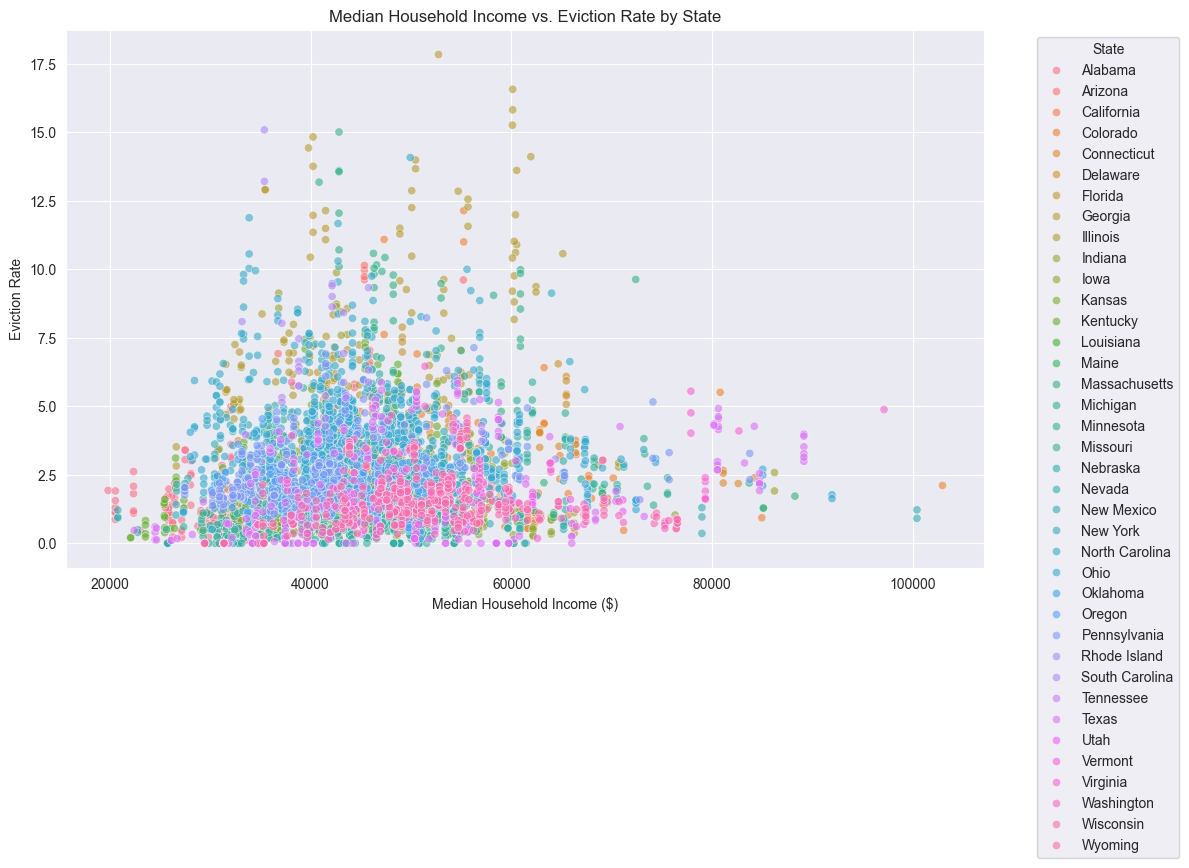

In [265]:
# Scatter Plot of Median Household Income vs. Eviction Rate
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='median.household.income', y='eviction.rate', hue='State', alpha=0.6)
plt.title('Median Household Income vs. Eviction Rate by State')
plt.xlabel('Median Household Income ($)')
plt.ylabel('Eviction Rate')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

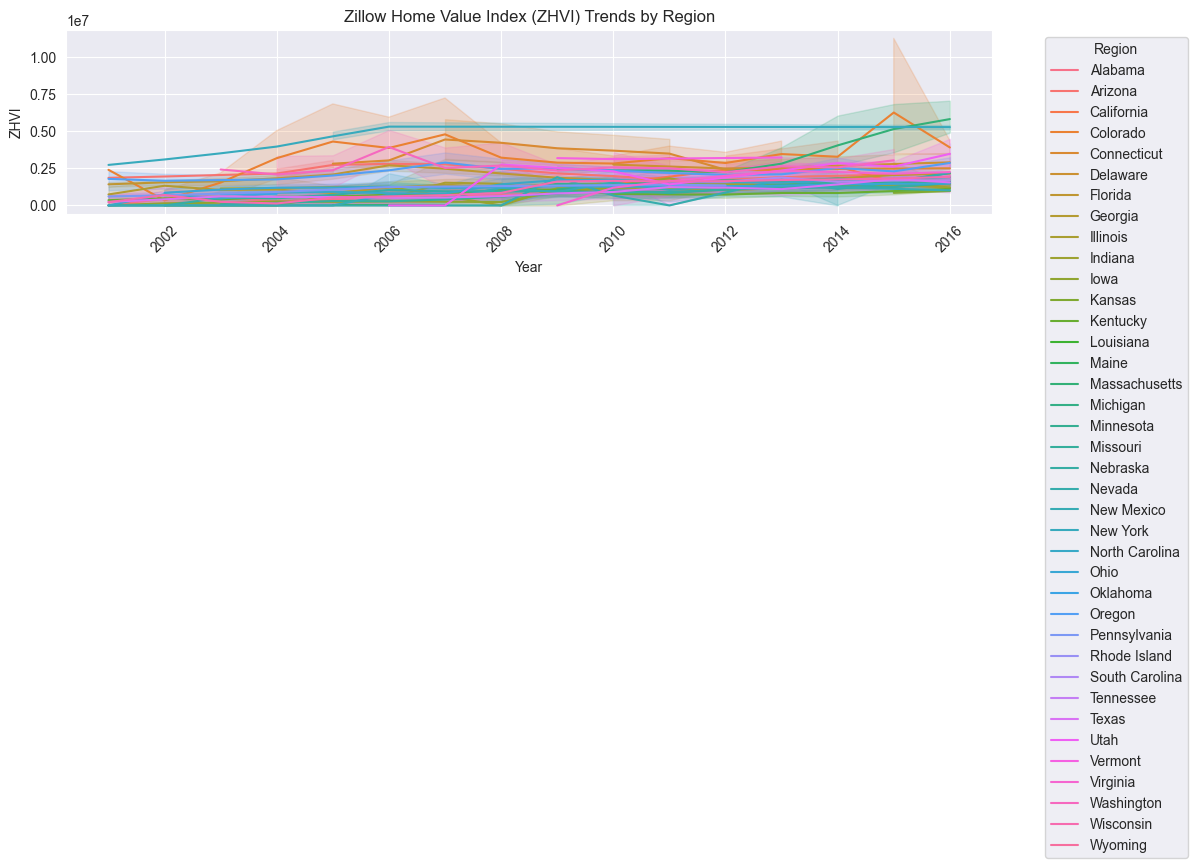

In [266]:
# Time Series Line Plot of ZHVI
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='ZHVI', hue='State')
plt.title('Zillow Home Value Index (ZHVI) Trends by Region')
plt.ylabel('ZHVI')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

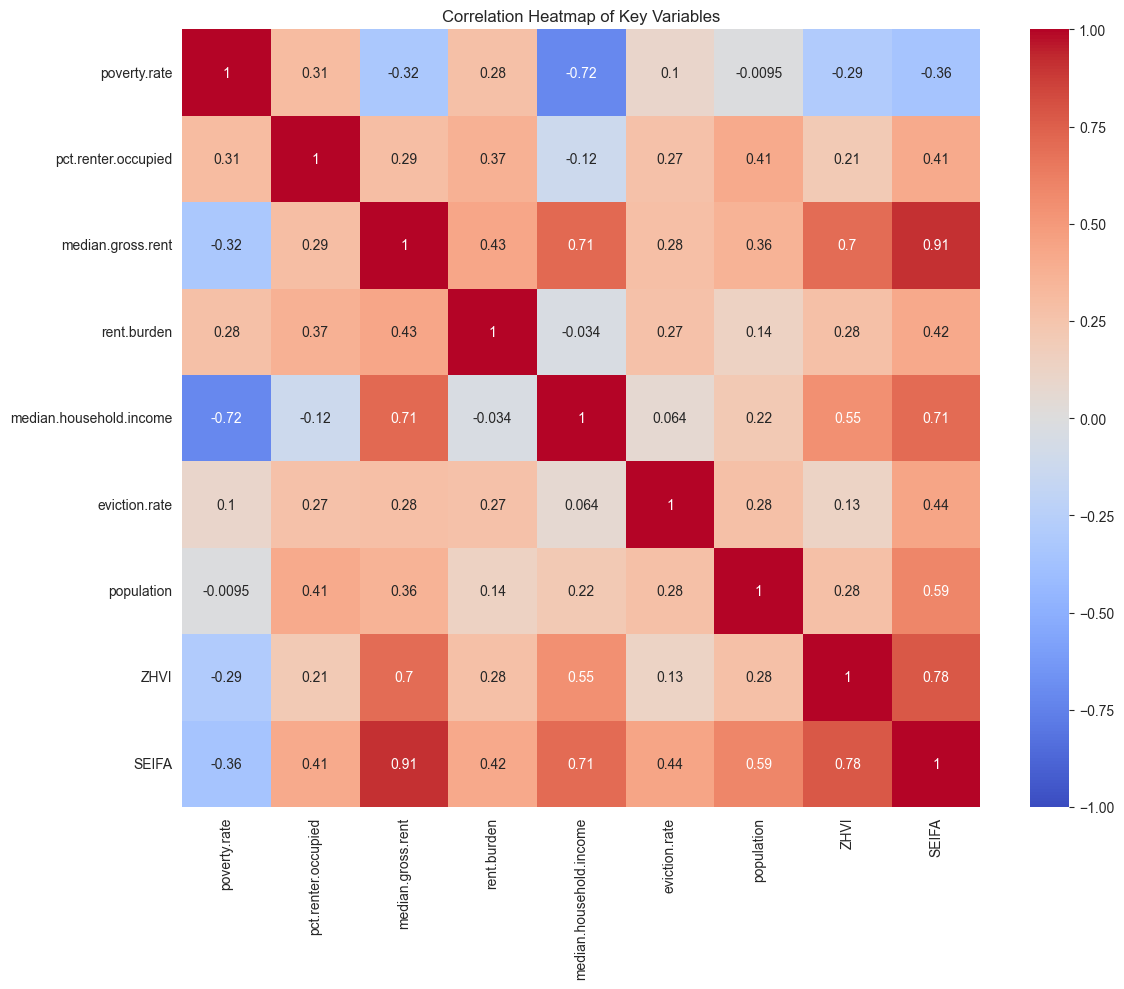

In [267]:
# Heatmap of Correlation Matrix
correlation_matrix = data[['poverty.rate', 'pct.renter.occupied', 'median.gross.rent', 
                           'rent.burden', 'median.household.income', 'eviction.rate', 
                           'population', 'ZHVI', 'SEIFA']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Key Variables')
plt.tight_layout()
plt.show()

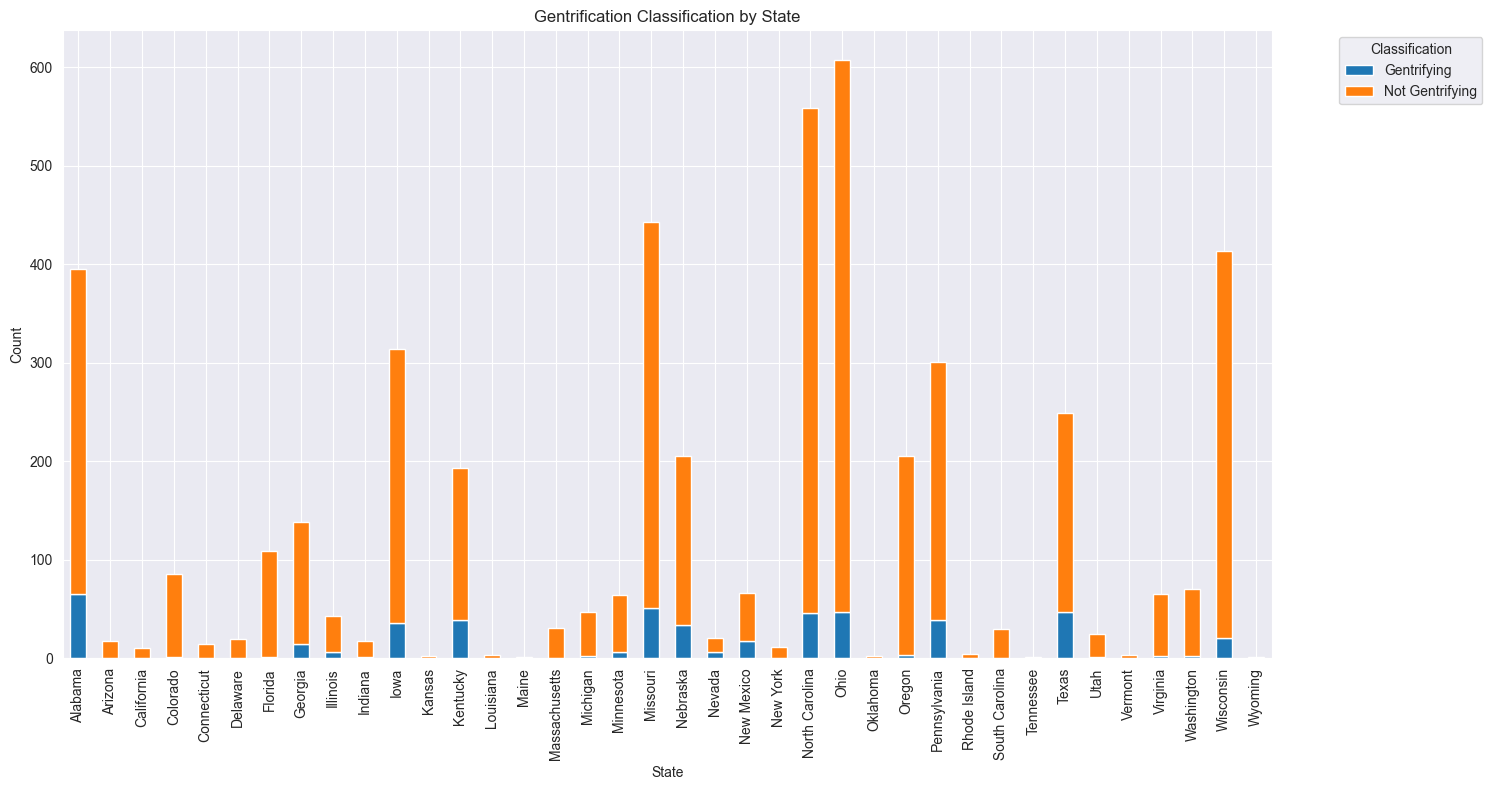

In [268]:
# Bar Plot of Gentrification Classification by State
classification_by_state = data.groupby(['State', 'Classification']).size().unstack()
classification_by_state.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Gentrification Classification by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [269]:
# Validate Data Quality:

#Check for missing values, duplicates, or inconsistent formats in the final dataset
data.isnull().sum()

GEOID                         0
Year                          0
RegionName                    0
State                         0
population                    0
poverty.rate                  0
renter.occupied.households    0
pct.renter.occupied           0
median.gross.rent             0
median.household.income       0
median.property.value         0
rent.burden                   0
pct.white                     0
pct.af.am                     0
pct.hispanic                  0
pct.am.ind                    0
pct.asian                     0
pct.nh.pi                     0
pct.multiple                  0
pct.other                     0
eviction.filings              0
evictions                     0
eviction.rate                 0
eviction.filing.rate          0
low.flag                      0
imputed                       0
subbed                        0
RegionID                      0
SizeRank                      0
RegionType                    0
Metro                         0
StateCod

In [270]:
data.duplicated().sum()

np.int64(0)

In [271]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4789 entries, 1 to 10829
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GEOID                       4789 non-null   int64  
 1   Year                        4789 non-null   int64  
 2   RegionName                  4789 non-null   object 
 3   State                       4789 non-null   object 
 4   population                  4789 non-null   float64
 5   poverty.rate                4789 non-null   float64
 6   renter.occupied.households  4789 non-null   int64  
 7   pct.renter.occupied         4789 non-null   float64
 8   median.gross.rent           4789 non-null   float64
 9   median.household.income     4789 non-null   float64
 10  median.property.value       4789 non-null   float64
 11  rent.burden                 4789 non-null   float64
 12  pct.white                   4789 non-null   float64
 13  pct.af.am                   4789 non-

In [272]:
data.describe()

,GEOID,Year,population,poverty.rate,renter.occupied.households,pct.renter.occupied,median.gross.rent,median.household.income,median.property.value,rent.burden,...,subbed,RegionID,SizeRank,StateCodeFIPS,MunicipalCodeFIPS,ZHVI,SEIFA,Rank,Rank_Change,Rank_Change_SD
count,4789.000000,4789.000000,4.789000e+03,4789.000000,4789.000000,4789.000000,4789.00000,4789.000000,4789.000000,4789.000000,...,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4.789000e+03,4789.000000,4789.000000,4789.000000,4.789000e+03
mean,31905.756734,2009.591773,1.650370e+05,11.069219,22762.897891,28.548175,655.01587,45933.951556,132897.577782,27.974755,...,0.000418,1576.820004,1128.177490,31.817707,88.049488,1.297920e+06,0.936733,234.919816,10.731050,5.414119e+01
std,15179.741548,4.241038,3.475318e+05,4.749738,54945.945203,7.351111,165.54142,10386.121400,61360.374562,4.165497,...,0.020434,907.766486,844.457552,15.175855,70.933581,1.051976e+06,1.773930,174.772696,43.197971,7.106169e-15
min,1001.000000,2001.000000,4.330000e+02,0.000000,61.000000,10.770000,178.00000,19819.000000,28600.000000,12.300000,...,0.000000,67.000000,1.000000,1.000000,1.000000,0.000000e+00,-3.775729,1.000000,-352.000000,5.414119e+01
25%,21023.000000,2006.000000,2.260400e+04,7.640000,2279.000000,23.570000,553.00000,39071.000000,94600.000000,25.400000,...,0.000000,781.000000,436.000000,21.000000,35.000000,0.000000e+00,-0.243662,94.000000,-6.000000,5.414119e+01
50%,37063.000000,2010.000000,5.386400e+04,10.590000,6190.000000,27.540000,640.00000,44770.000000,120000.000000,28.000000,...,0.000000,1582.000000,905.000000,37.000000,77.000000,1.341481e+06,0.802356,194.000000,6.000000,5.414119e+01
75%,41053.000000,2013.000000,1.394430e+05,13.590000,16511.000000,32.750000,741.00000,51665.000000,153000.000000,30.400000,...,0.000000,2360.000000,1703.000000,41.000000,125.000000,1.814782e+06,1.956371,343.000000,24.000000,5.414119e+01
max,56041.000000,2016.000000,5.257001e+06,35.810000,825201.000000,81.030000,1445.00000,102964.000000,750000.000000,50.000000,...,1.000000,3244.000000,3212.000000,56.000000,505.000000,1.348623e+07,9.105134,762.000000,315.000000,5.414119e+01


In [273]:
# Understand the dataset, identify patterns, and generate hypotheses for modeling.

# Understand Target Variable:
# Distribution of the target variable 'Classification'
data['Classification'].value_counts(normalize=True)

Classification
Not Gentrifying    0.897891
Gentrifying        0.102109
Name: proportion, dtype: float64

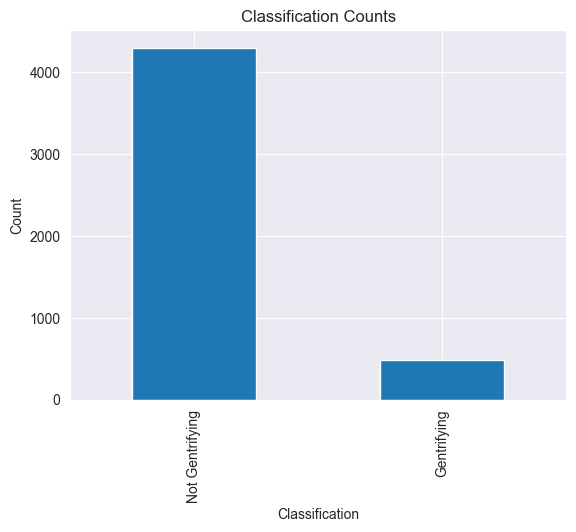

In [274]:
data['Classification'].value_counts().plot(kind='bar', title='Classification Counts')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

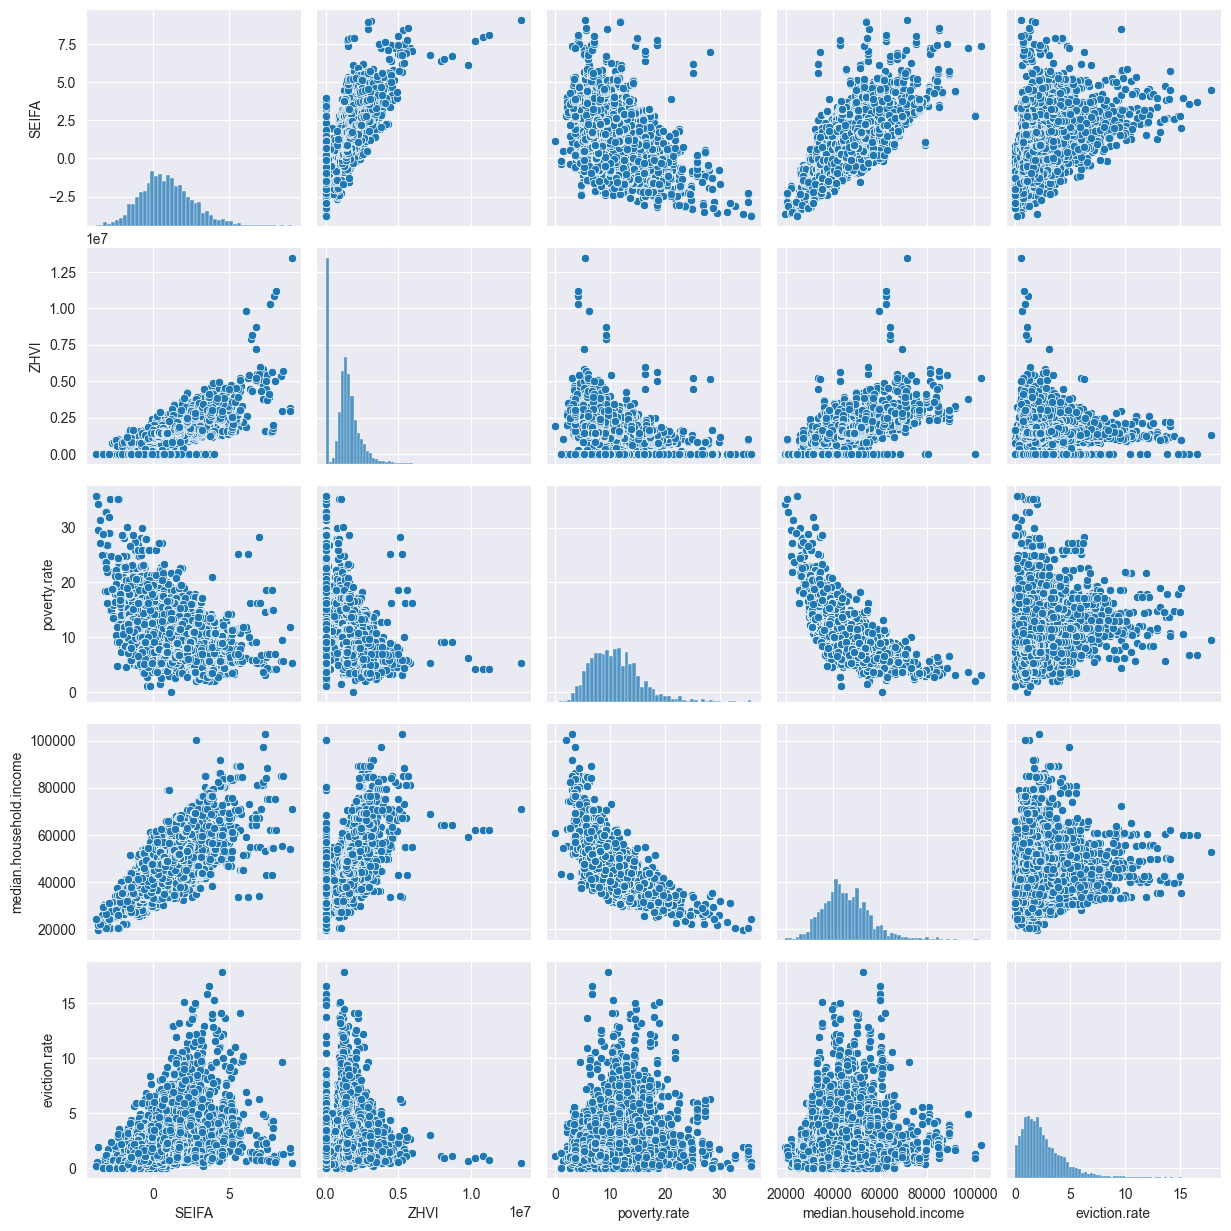

In [275]:
# Feature Relationships: Use pair plots or scatter plots to explore relationships between SEIFA, ZHVI, and other socioeconomic factors.
sns.pairplot(data[['SEIFA', 'ZHVI', 'poverty.rate', 'median.household.income', 'eviction.rate']])
plt.show()

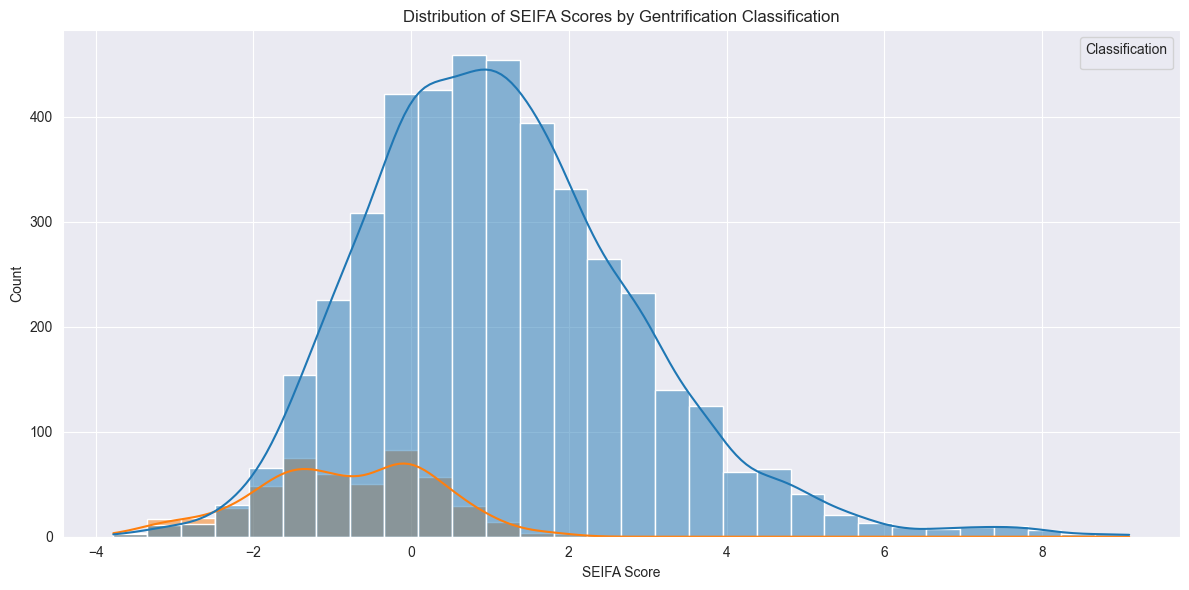

In [276]:
# Distribution of SEIFA Scores by Gentrification Classification
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='SEIFA', hue='Classification', kde=True, bins=30)
plt.title('Distribution of SEIFA Scores by Gentrification Classification')
plt.xlabel('SEIFA Score')
plt.ylabel('Count')
plt.legend(title='Classification')
plt.tight_layout()
plt.show()

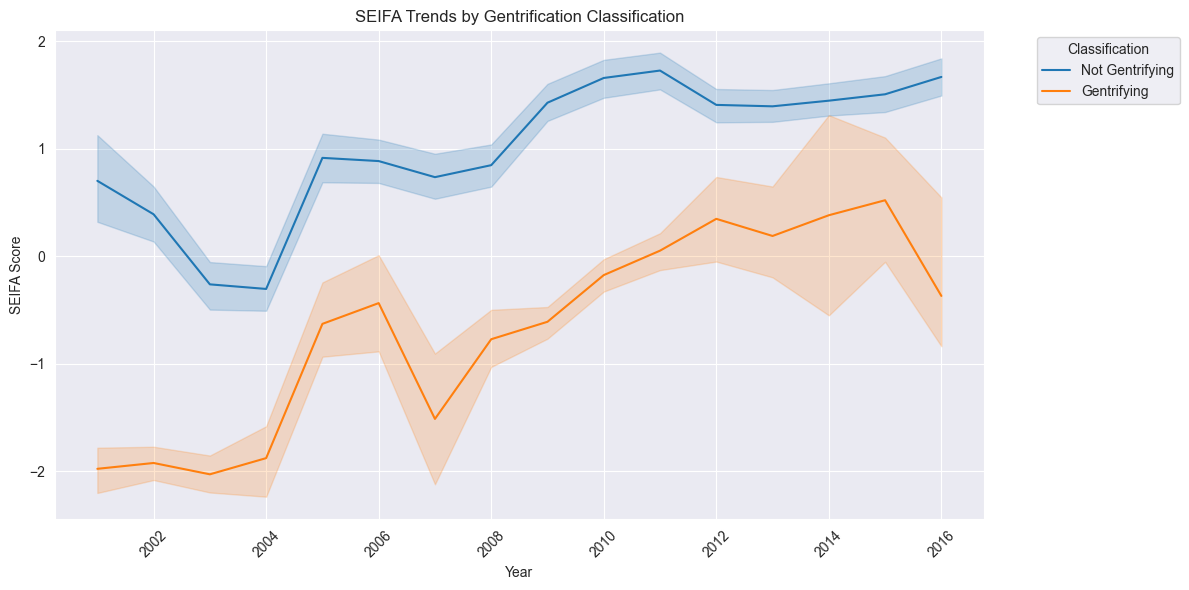

In [277]:
# Analyze how key variables like ZHVI, SEIFA, or eviction.rate change over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='SEIFA', hue='Classification')
plt.title('SEIFA Trends by Gentrification Classification')
plt.ylabel('SEIFA Score')
plt.xticks(rotation=45)
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

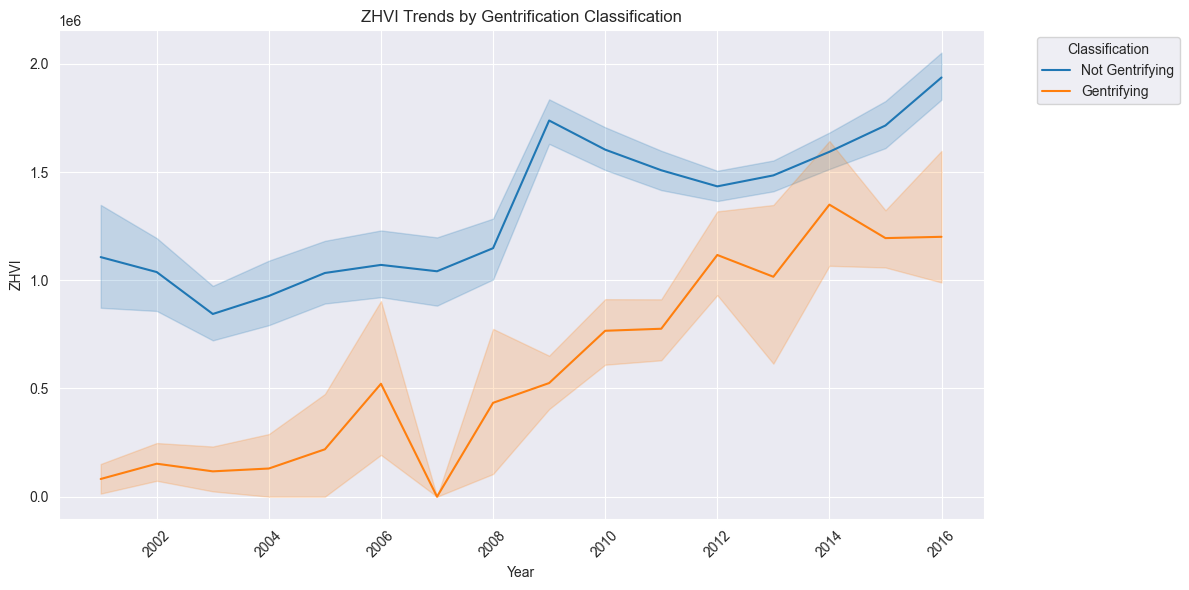

In [278]:
# Analyze how key variables like ZHVI, SEIFA, or eviction.rate change over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='ZHVI', hue='Classification')
plt.title('ZHVI Trends by Gentrification Classification')
plt.ylabel('ZHVI')
plt.xticks(rotation=45)
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

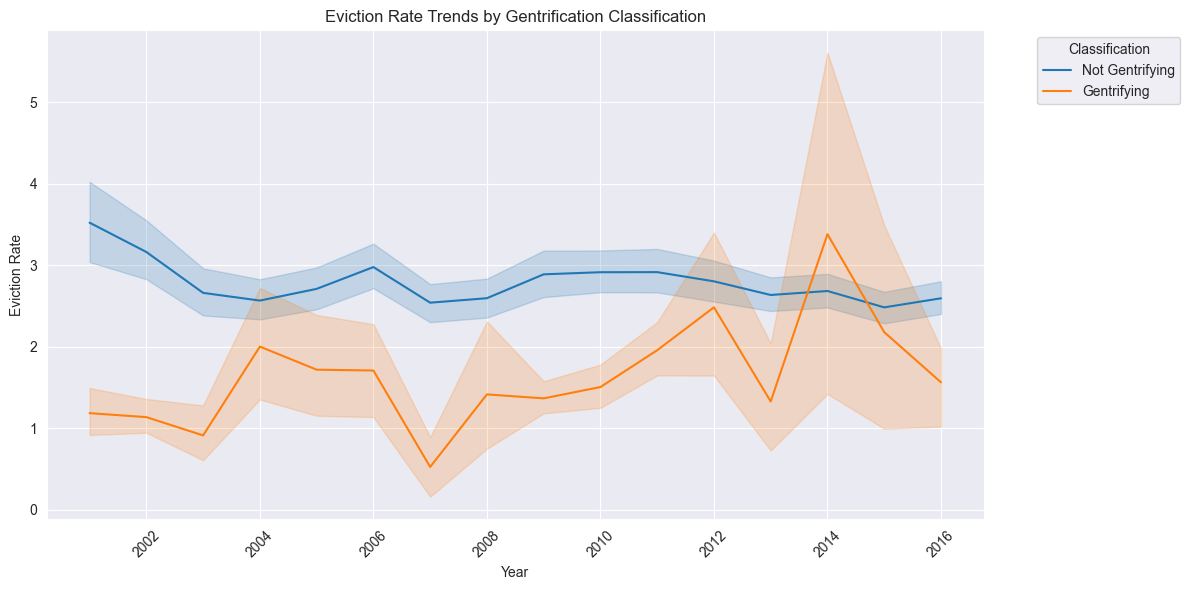

In [279]:
# Analyze how key variables like ZHVI, SEIFA, or eviction.rate change over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='eviction.rate', hue='Classification')
plt.title('Eviction Rate Trends by Gentrification Classification')
plt.ylabel('Eviction Rate')
plt.xticks(rotation=45)
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

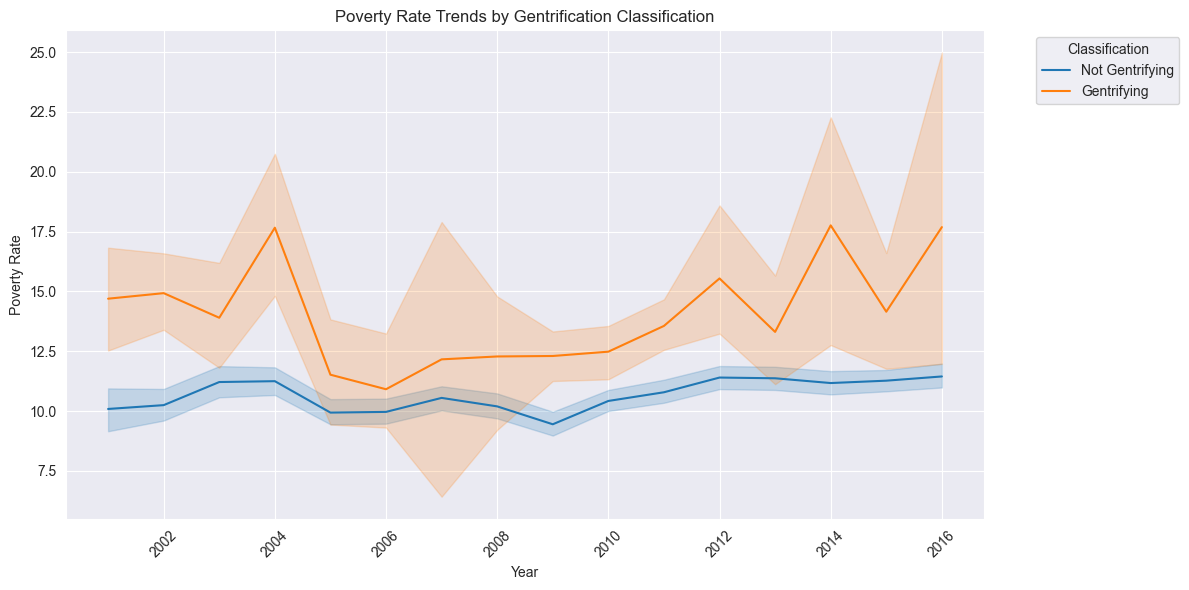

In [280]:
# Analyze how key variables like ZHVI, SEIFA, or eviction.rate change over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='poverty.rate', hue='Classification')
plt.title('Poverty Rate Trends by Gentrification Classification')   
plt.ylabel('Poverty Rate')
plt.xticks(rotation=45)
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

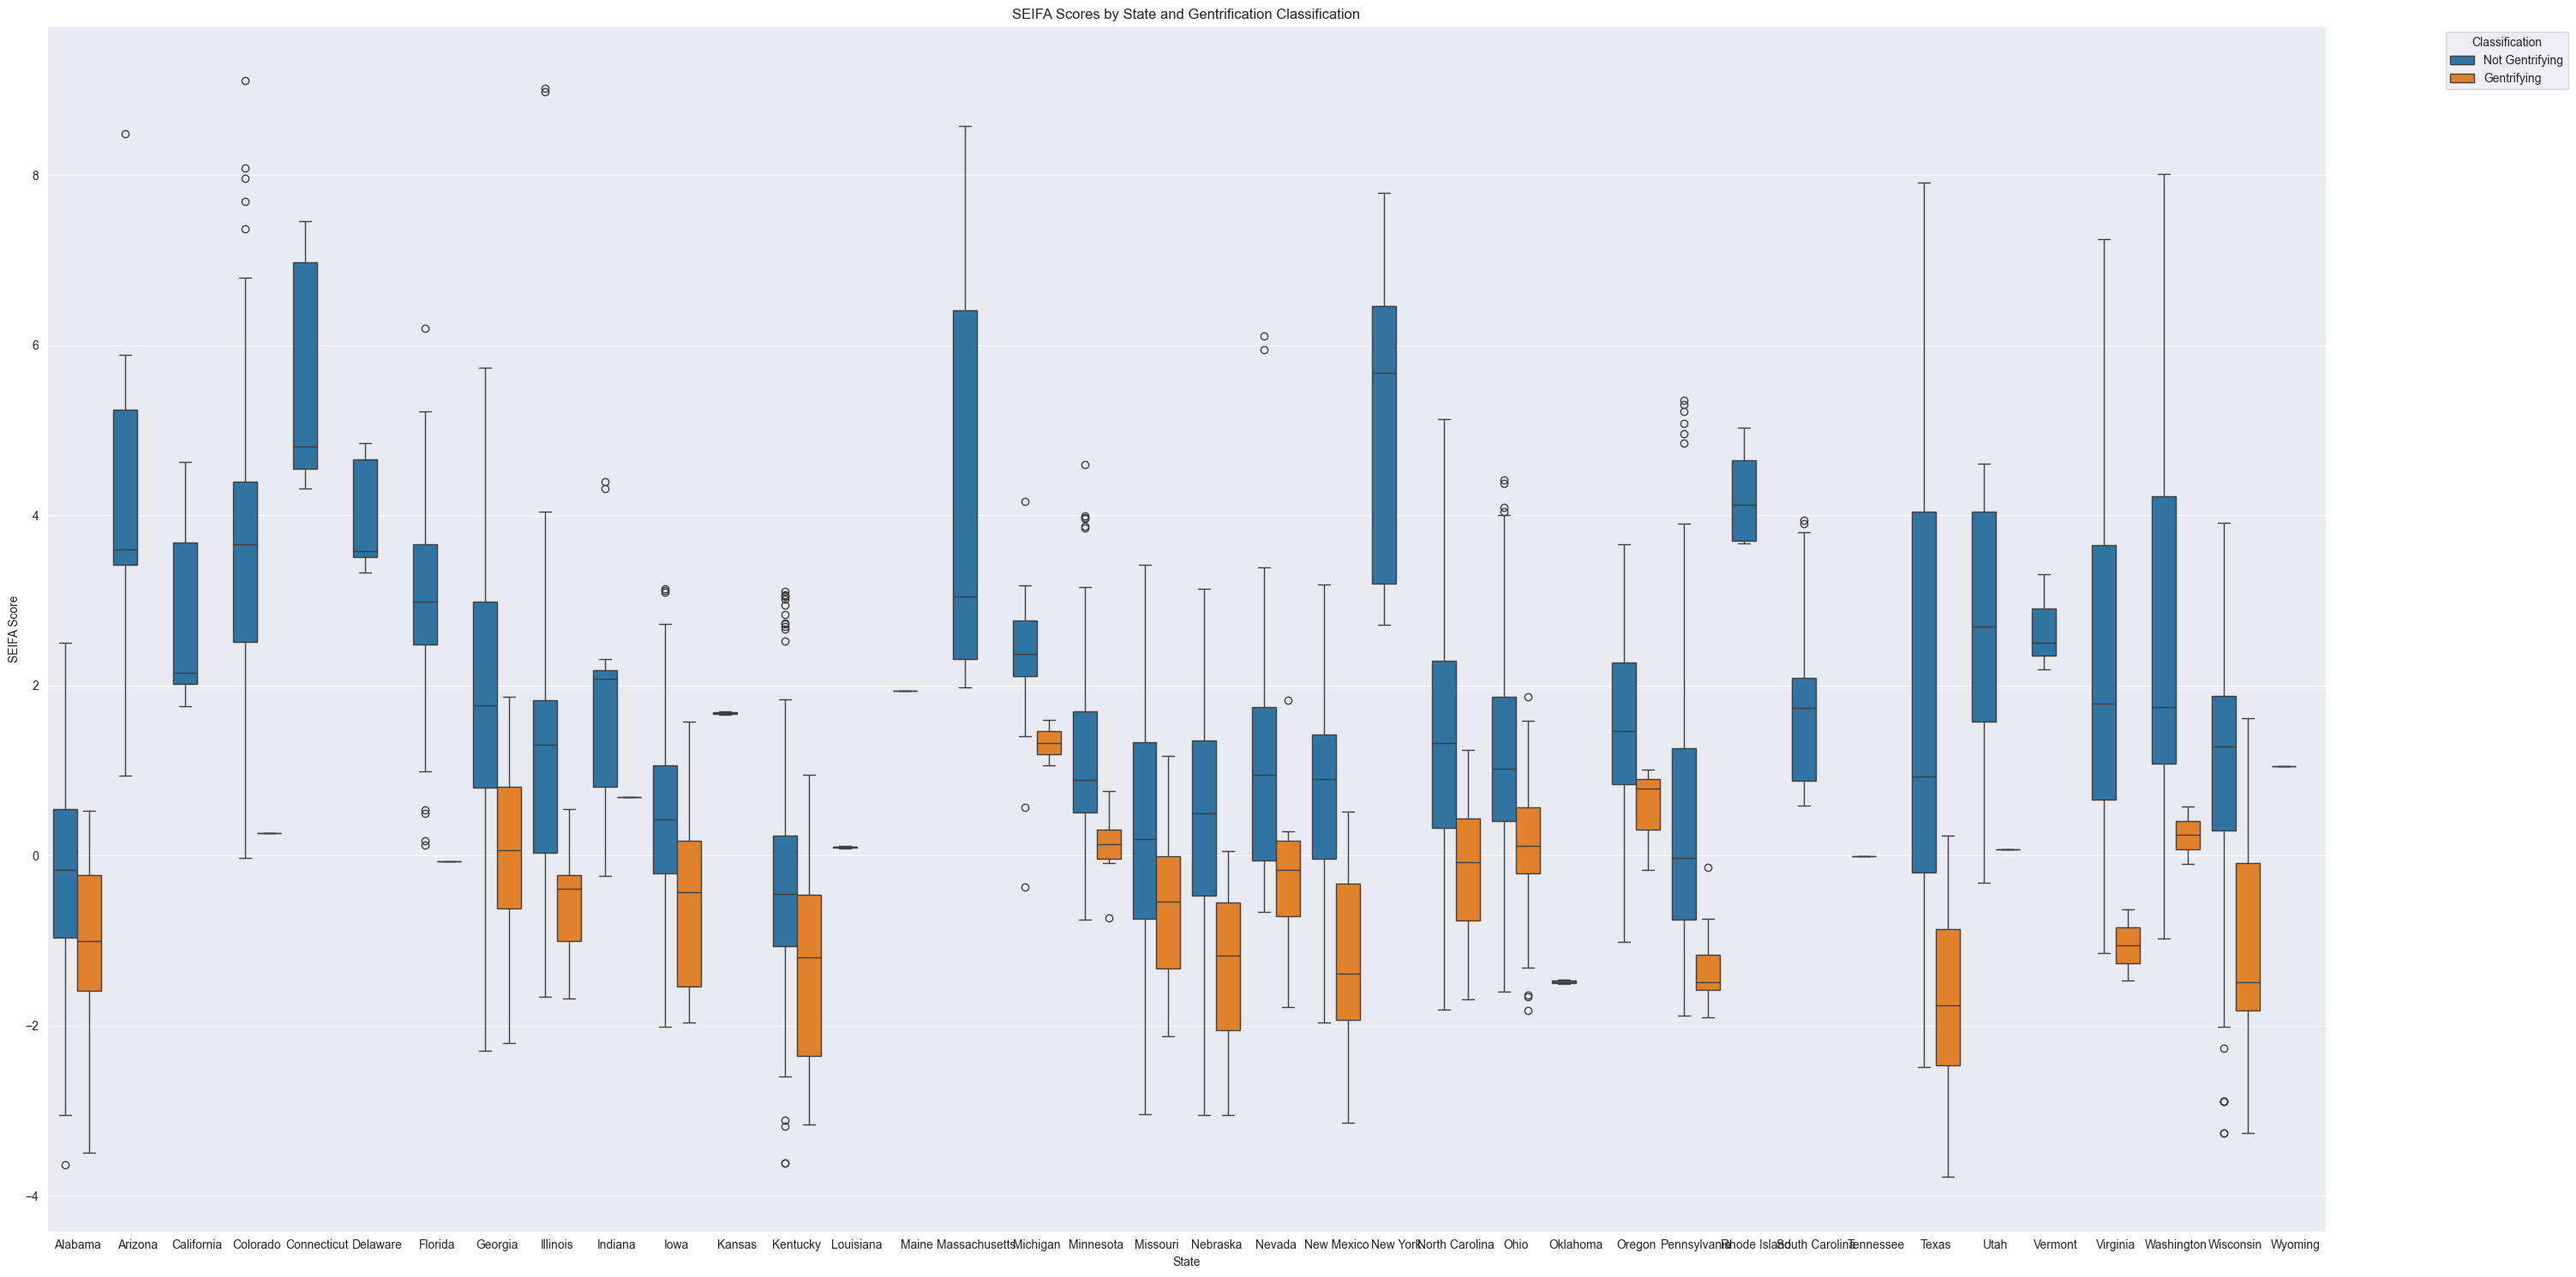

In [281]:
# Geospatial Trends: Plot geospatial data if longitude/latitude is available, or aggregate by regions/states.
plt.figure(figsize=(30,15))
sns.boxplot(data=data, x='State', y='SEIFA', hue='Classification')
plt.title('SEIFA Scores by State and Gentrification Classification')
plt.xlabel('State')
plt.ylabel('SEIFA Score')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() 

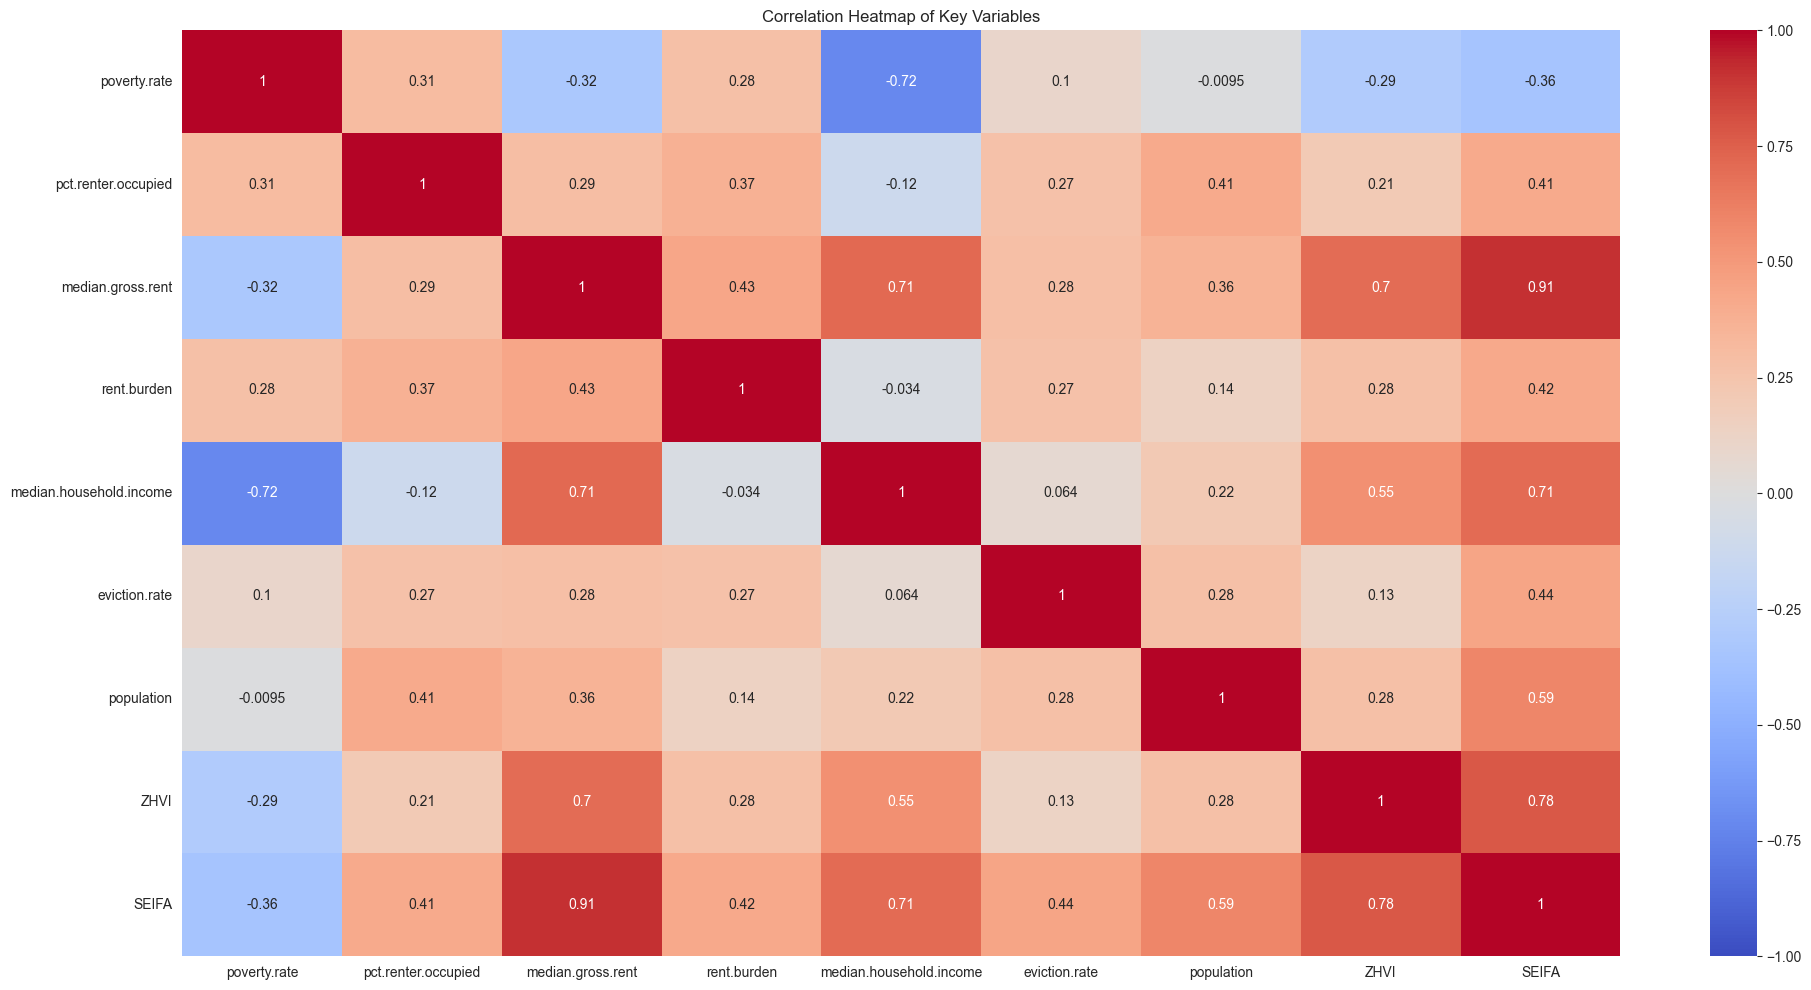

In [282]:
# Check correlations to identify multicollinearity and feature importance
correlation_matrix = data[['poverty.rate', 'pct.renter.occupied', 'median.gross.rent', 
                           'rent.burden', 'median.household.income', 'eviction.rate', 
                           'population', 'ZHVI', 'SEIFA']].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Key Variables')
plt.tight_layout()
plt.show()


In [283]:
#median.gross.rent and SEIFA has a correlation of 0.91. What should I do?

In [284]:
# Step 2: Feature Engineering

# Create new features or transform existing features to improve model performance
# Compute additional metrics such as: rent-to-income ratio, population density, etc.
data['rent_to_income_ratio'] = data['median.gross.rent'] / data['median.household.income']
data['population_density'] = data['population'] / data['ZHVI']

In [285]:
# Year-on-year change in ZHVI or SEIFA (growth rates).
data['ZHVI_growth_rate'] = data.groupby('RegionName')['ZHVI'].pct_change()

In [286]:
# Rolling averages for variables like eviction.rate.
data['eviction_rate_rolling_mean'] = data.groupby('GEOID')['eviction.rate'].rolling(window=3).mean().reset_index(0, drop=True)

In [287]:
# Encode Categorical Variables: Convert categorical features (e.g., State, RegionType) into numeric values using one-hot encoding or label encoding.

# One-Hot Encoding for State
data = pd.get_dummies(data, columns=['State'], drop_first=True)

# Label Encoding for RegionType
data['RegionType'] = data['RegionType'].astype('category').cat.codes


In [288]:
print(data.head())

# Print which fetures are correlated with the target variable
# correlation_with_target = data.corr()['Classification'].sort_values(ascending=False)

   GEOID  Year      RegionName  population  poverty.rate  \
1   1001  2009  Autauga County     49584.0          7.52   
2   1001  2011  Autauga County     55221.0          9.28   
3   1001  2012  Autauga County     55221.0          9.28   
4   1001  2013  Autauga County     55221.0          9.28   
5   1001  2014  Autauga County     55221.0          9.28   

   renter.occupied.households  pct.renter.occupied  median.gross.rent  \
1                        4783                22.45              779.0   
2                        5040                26.08              883.0   
3                        5107                26.08              883.0   
4                        5174                26.08              883.0   
5                        5240                26.08              883.0   

   median.household.income  median.property.value  ...  State_Rhode Island  \
1                  51463.0               130700.0  ...               False   
2                  51281.0               141

In [289]:
import pandas as pd

# Describe the data for numerical columns only
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Look for columns with high variance or large ranges
wide_range_columns = [col for col in numerical_data.columns if numerical_data[col].max() - numerical_data[col].min() > 1000]
print("Columns with wide ranges:", wide_range_columns)



Columns with wide ranges: ['GEOID', 'population', 'renter.occupied.households', 'median.gross.rent', 'median.household.income', 'median.property.value', 'eviction.filings', 'evictions', 'RegionID', 'SizeRank', 'ZHVI', 'population_density', 'ZHVI_growth_rate']


In [290]:
# Ensure numeric features (e.g., poverty.rate, median.gross.rent) are scaled for consistent model performance.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['population', 'renter.occupied.households', 'median.gross.rent', 'median.household.income', 'median.property.value', 'eviction.filings', 'evictions', 'SizeRank', 'ZHVI']])

In [291]:
# total number of observations
print(data.shape[0])

#no of observations that has NaN values- only for Classification column

# Check for NaN values in the 'Classification' column
nan_count = data['Classification'].isna().sum()

# Print the result
print(f"Number of observations with NaN in 'Classification' column: {nan_count}")


4789
Number of observations with NaN in 'Classification' column: 0


In [292]:
# Perform PCA to reduce dimensionality and capture key components of the data.
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_scaled) 


# Number of components to explain 95% of the variance
print("Number of components:", pca.n_components_)

# Create the DataFrame with PCA components and ensure 'Classification' is aligned correctly
data_preprocessed = pd.DataFrame(data_pca, columns=[f'PCA_{i+1}' for i in range(data_pca.shape[1])])

# Ensure that the 'Classification' column is properly added back to the new DataFrame
data_preprocessed['Classification'] = data['Classification'].values

# Check the first few rows to ensure the 'Classification' column is properly added
print(data_preprocessed.head())

# Total number of observations after PCA and adding 'Classification' column
print(data_preprocessed.shape[0])

# Check for NaN values in the 'Classification' column again
nan_count = data_preprocessed['Classification'].isna().sum()
print(f"Number of observations with NaN in 'Classification' column: {nan_count}")


Number of components: 5
      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5   Classification
0  0.107665  1.089156 -0.267805  0.207512  0.237520  Not Gentrifying
1  0.330537  1.330187 -0.236418  0.328912  0.578018  Not Gentrifying
2  0.341273  1.325608 -0.232900  0.324250  0.584286  Not Gentrifying
3  0.356645  1.338976 -0.231095  0.299909  0.579937  Not Gentrifying
4  0.359597  1.356610 -0.233118  0.281758  0.568465  Not Gentrifying
4789
Number of observations with NaN in 'Classification' column: 0


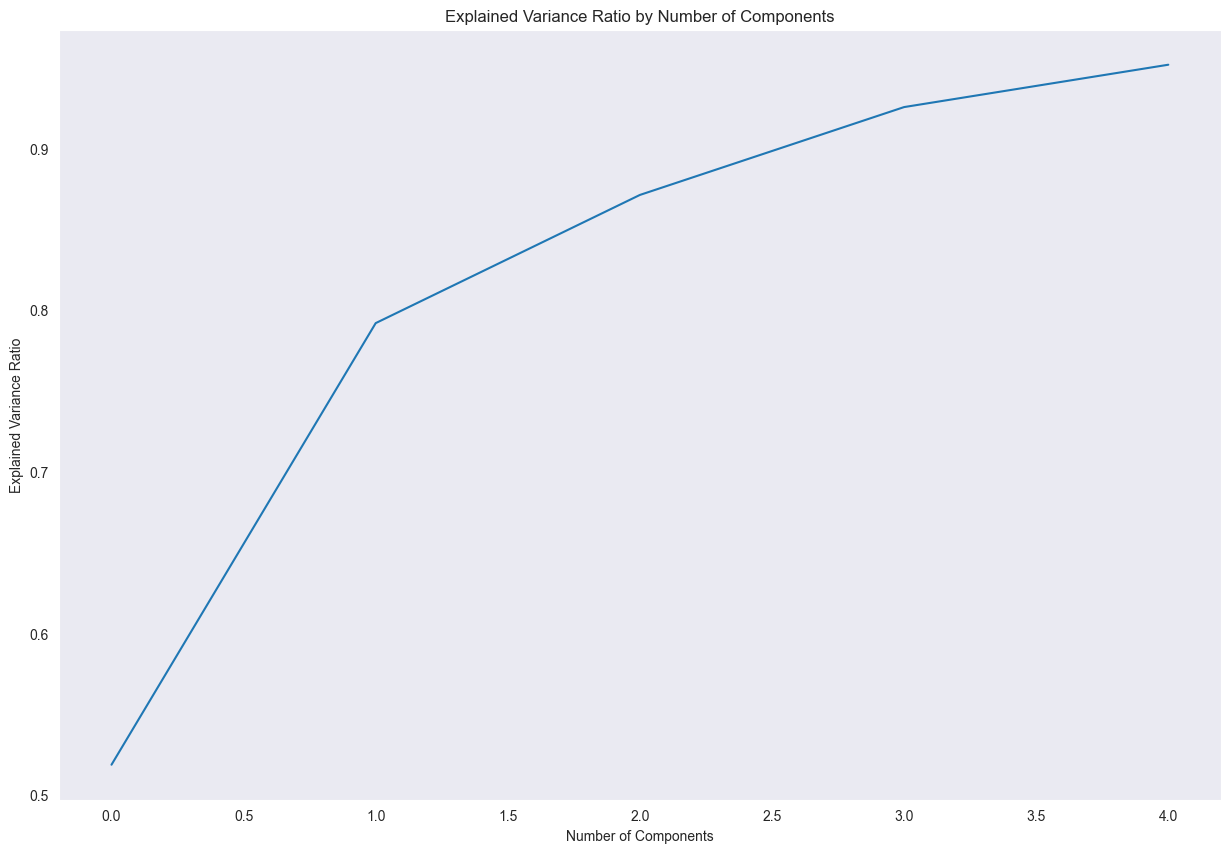

In [293]:
# Visualize the explained variance ratio of PCA components
plt.figure(figsize=(15, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid()
plt.show()


In [294]:
# Handle Class Imbalance: If Classification is imbalanced, use techniques like oversampling (SMOTE) or assign class weights in models.
data_preprocessed['Classification'].value_counts()


Classification
Not Gentrifying    4300
Gentrifying         489
Name: count, dtype: int64

In [295]:

# Handle Class Imbalance: If Classification is imbalanced, use techniques like oversampling (SMOTE) or assign class weights in models.
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = data_preprocessed.drop('Classification', axis=1)
y = data_preprocessed['Classification']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after resampling
print(y_resampled.value_counts())


Classification
Not Gentrifying    4300
Gentrifying        4300
Name: count, dtype: int64


In [296]:
# Train Binary Classification Models :: Predict whether a region is "Gentrifying" or "Not Gentrifying".

# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X = data_preprocessed.drop('Classification', axis=1)
y = data_preprocessed['Classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [297]:
# Train Binary Classification Models :: Predict whether a region is "Gentrifying" or "Not Gentrifying".

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

#print the accuracy score, precision, recall, and F1-score.
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision
precision = precision_score(y_test, y_pred, pos_label='Gentrifying')

# Calculate the recall
recall = recall_score(y_test, y_pred, pos_label='Gentrifying')

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, pos_label='Gentrifying')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



                 precision    recall  f1-score   support

    Gentrifying       0.57      0.04      0.08        94
Not Gentrifying       0.91      1.00      0.95       864

       accuracy                           0.90       958
      macro avg       0.74      0.52      0.51       958
   weighted avg       0.87      0.90      0.86       958

Accuracy: 0.90
Precision: 0.57
Recall: 0.04
F1 Score: 0.08


In [298]:

# Train a Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_rf))

#print the accuracy score, precision, recall, and F1-score.
# Calculate the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate the precision
precision_rf = precision_score(y_test, y_pred_rf, pos_label='Gentrifying')

# Calculate the recall
recall_rf = recall_score(y_test, y_pred_rf, pos_label='Gentrifying')

# Calculate the F1 score
f1_rf = f1_score(y_test, y_pred_rf, pos_label='Gentrifying')

# Print the evaluation metrics
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")



                 precision    recall  f1-score   support

    Gentrifying       0.29      0.12      0.17        94
Not Gentrifying       0.91      0.97      0.94       864

       accuracy                           0.89       958
      macro avg       0.60      0.54      0.55       958
   weighted avg       0.85      0.89      0.86       958

Accuracy: 0.89
Precision: 0.29
Recall: 0.12
F1 Score: 0.17


In [299]:
# Train Binary Classification Models :: Predict whether a region is "Gentrifying" or "Not Gentrifying".

# Train a Support Vector Machine (SVM) model

from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC()

# Fit the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_svm))

#print the accuracy score, precision, recall, and F1-score.
# Calculate the accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Calculate the precision
precision_svm = precision_score(y_test, y_pred_svm, pos_label='Gentrifying')

# Calculate the recall
recall_svm = recall_score(y_test, y_pred_svm, pos_label='Gentrifying')

# Calculate the F1 score
f1_svm = f1_score(y_test, y_pred_svm, pos_label='Gentrifying')

# Print the evaluation metrics
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1 Score: {f1_svm:.2f}")


                 precision    recall  f1-score   support

    Gentrifying       0.00      0.00      0.00        94
Not Gentrifying       0.90      1.00      0.95       864

       accuracy                           0.90       958
      macro avg       0.45      0.50      0.47       958
   weighted avg       0.81      0.90      0.86       958

Accuracy: 0.90
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


In [300]:
# # Implement XGBoost Classifier
# from xgboost import XGBClassifier
# 
# # Initialize the XGBoost model
# xgb = XGBClassifier()
# 
# # Fit the model on the training data
# xgb.fit(X_train, y_train)
# 
# # Make predictions on the test data
# y_pred_xgb = xgb.predict(X_test)
# 
# # Print the classification report
# print(classification_report(y_test, y_pred_xgb))
# 
# # Calculate the accuracy score
# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# 
# # Calculate the precision
# precision_xgb = precision_score(y_test, y_pred_xgb, pos_label='Gentrifying')
# 
# # Calculate the recall
# recall_xgb = recall_score(y_test, y_pred_xgb, pos_label='Gentrifying')
# 
# # Calculate the F1 score
# f1_xgb = f1_score(y_test, y_pred_xgb, pos_label='Gentrifying')
# 
# # Print the evaluation metrics
# print(f"Accuracy: {accuracy_xgb:.2f}")
# print(f"Precision: {precision_xgb:.2f}")
# print(f"Recall: {recall_xgb:.2f}")
# print(f"F1 Score: {f1_xgb:.2f}")
# 
# # ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['Gentrifying' 'Not Gentrifying']
# 


In [301]:
# Train Binary Classification Models :: Predict whether a region is "Gentrifying" or "Not Gentrifying".

# Train a Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier()

# Fit the model on the training data
gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_gb))

#print the accuracy score, precision, recall, and F1-score.
# Calculate the accuracy score
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Calculate the precision
precision_gb = precision_score(y_test, y_pred_gb, pos_label='Gentrifying')

# Calculate the recall
recall_gb = recall_score(y_test, y_pred_gb, pos_label='Gentrifying')

# Calculate the F1 score
f1_gb = f1_score(y_test, y_pred_gb, pos_label='Gentrifying')

# Print the evaluation metrics
print(f"Accuracy: {accuracy_gb:.2f}")
print(f"Precision: {precision_gb:.2f}")
print(f"Recall: {recall_gb:.2f}")
print(f"F1 Score: {f1_gb:.2f}")


                 precision    recall  f1-score   support

    Gentrifying       0.57      0.09      0.15        94
Not Gentrifying       0.91      0.99      0.95       864

       accuracy                           0.90       958
      macro avg       0.74      0.54      0.55       958
   weighted avg       0.88      0.90      0.87       958

Accuracy: 0.90
Precision: 0.57
Recall: 0.09
F1 Score: 0.15


In [302]:
# # Train Binary Classification Models :: Predict whether a region is "Gentrifying" or "Not Gentrifying".
# 
# # Train a XGBoost Classifier model
# from xgboost import XGBClassifier
# 
# # Initialize the XGBoost model
# xgb = XGBClassifier()
# 
# # Fit the model on the training data
# xgb.fit(X_train, y_train)
# 
# # Make predictions on the test data
# y_pred_xgb = xgb.predict(X_test)
# 
# # Print the classification report
# print(classification_report(y_test, y_pred_xgb))
# 
# #print the accuracy score, precision, recall, and F1-score.
# # Calculate the accuracy score
# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# 
# # Calculate the precision
# precision_xgb = precision_score(y_test, y_pred_xgb, pos_label='Gentrifying')
# 
# # Calculate the recall
# recall_xgb = recall_score(y_test, y_pred_xgb, pos_label='Gentrifying')
# 
# # Calculate the F1 score
# f1_xgb = f1_score(y_test, y_pred_xgb, pos_label='Gentrifying')
# 
# # Print the evaluation metrics
# print(f"Accuracy: {accuracy_xgb:.2f}")
# print(f"Precision: {precision_xgb:.2f}")
# print(f"Recall: {recall_xgb:.2f}")
# print(f"F1 Score: {f1_xgb:.2f}")


In [303]:
# # Train Binary Classification Models :: Predict whether a region is "Gentrifying" or "Not Gentrifying".

# Train a Neural Network model
from sklearn.neural_network import MLPClassifier

# Initialize the Neural Network model
nn = MLPClassifier()

# Fit the model on the training data
nn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nn = nn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_nn))

#print the accuracy score, precision, recall, and F1-score.
# Calculate the accuracy score
accuracy_nn = accuracy_score(y_test, y_pred_nn)

# Calculate the precision
precision_nn = precision_score(y_test, y_pred_nn, pos_label='Gentrifying')

# Calculate the recall
recall_nn = recall_score(y_test, y_pred_nn, pos_label='Gentrifying')

# Calculate the F1 score
f1_nn = f1_score(y_test, y_pred_nn, pos_label='Gentrifying')

# Print the evaluation metrics
print(f"Accuracy: {accuracy_nn:.2f}")
print(f"Precision: {precision_nn:.2f}")
print(f"Recall: {recall_nn:.2f}")
print(f"F1 Score: {f1_nn:.2f}")


                 precision    recall  f1-score   support

    Gentrifying       0.50      0.06      0.11        94
Not Gentrifying       0.91      0.99      0.95       864

       accuracy                           0.90       958
      macro avg       0.70      0.53      0.53       958
   weighted avg       0.87      0.90      0.87       958

Accuracy: 0.90
Precision: 0.50
Recall: 0.06
F1 Score: 0.11


In [304]:
# # Train Binary Classification Models :: Predict whether a region is "Gentrifying" or "Not Gentrifying".

# Train a K-Nearest Neighbors (KNN) model
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_knn))

#print the accuracy score, precision, recall, and F1-score.
# Calculate the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Calculate the precision
precision_knn = precision_score(y_test, y_pred_knn, pos_label='Gentrifying')

# Calculate the recall
recall_knn = recall_score(y_test, y_pred_knn, pos_label='Gentrifying')

# Calculate the F1 score
f1_knn = f1_score(y_test, y_pred_knn, pos_label='Gentrifying')

# Print the evaluation metrics
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")


                 precision    recall  f1-score   support

    Gentrifying       0.39      0.16      0.23        94
Not Gentrifying       0.91      0.97      0.94       864

       accuracy                           0.89       958
      macro avg       0.65      0.57      0.59       958
   weighted avg       0.86      0.89      0.87       958

Accuracy: 0.89
Precision: 0.39
Recall: 0.16
F1 Score: 0.23


In [305]:
# # Train Binary Classification Models :: Predict whether a region is "Gentrifying" or "Not Gentrifying".

# Train a Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

# Fit the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_dt))

#print the accuracy score, precision, recall, and F1-score.
# Calculate the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Calculate the precision
precision_dt = precision_score(y_test, y_pred_dt, pos_label='Gentrifying')

# Calculate the recall
recall_dt = recall_score(y_test, y_pred_dt, pos_label='Gentrifying')

# Calculate the F1 score
f1_dt = f1_score(y_test, y_pred_dt, pos_label='Gentrifying')

# Print the evaluation metrics
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")


                 precision    recall  f1-score   support

    Gentrifying       0.17      0.15      0.16        94
Not Gentrifying       0.91      0.92      0.91       864

       accuracy                           0.85       958
      macro avg       0.54      0.54      0.54       958
   weighted avg       0.84      0.85      0.84       958

Accuracy: 0.85
Precision: 0.17
Recall: 0.15
F1 Score: 0.16


In [306]:
# # Train Binary Classification Models :: Predict whether a region is "Gentrifying" or "Not Gentrifying".

# Train a Naive Bayes Classifier model
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb = GaussianNB()

# Fit the model on the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = nb.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_nb))

#print the accuracy score, precision, recall, and F1-score.
# Calculate the accuracy score
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Calculate the precision
precision_nb = precision_score(y_test, y_pred_nb, pos_label='Gentrifying')

# Calculate the recall
recall_nb = recall_score(y_test, y_pred_nb, pos_label='Gentrifying')

# Calculate the F1 score
f1_nb = f1_score(y_test, y_pred_nb, pos_label='Gentrifying')

# Print the evaluation metrics
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1 Score: {f1_nb:.2f}")


                 precision    recall  f1-score   support

    Gentrifying       0.24      0.53      0.33        94
Not Gentrifying       0.94      0.81      0.87       864

       accuracy                           0.78       958
      macro avg       0.59      0.67      0.60       958
   weighted avg       0.87      0.78      0.82       958

Accuracy: 0.78
Precision: 0.24
Recall: 0.53
F1 Score: 0.33


In [307]:
# # Train Binary Classification Models :: Predict whether a region is "Gentrifying" or "Not Gentrifying".

# Train a Linear Discriminant Analysis (LDA) model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model on the training data
lda.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lda = lda.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_lda))

#print the accuracy score, precision, recall, and F1-score.
# Calculate the accuracy score
accuracy_lda = accuracy_score(y_test, y_pred_lda)

# Calculate the precision
precision_lda = precision_score(y_test, y_pred_lda, pos_label='Gentrifying')

# Calculate the recall
recall_lda = recall_score(y_test, y_pred_lda, pos_label='Gentrifying')

# Calculate the F1 score
f1_lda = f1_score(y_test, y_pred_lda, pos_label='Gentrifying')

# Print the evaluation metrics
print(f"Accuracy: {accuracy_lda:.2f}")
print(f"Precision: {precision_lda:.2f}")
print(f"Recall: {recall_lda:.2f}")
print(f"F1 Score: {f1_lda:.2f}")


                 precision    recall  f1-score   support

    Gentrifying       0.50      0.04      0.08        94
Not Gentrifying       0.91      1.00      0.95       864

       accuracy                           0.90       958
      macro avg       0.70      0.52      0.51       958
   weighted avg       0.87      0.90      0.86       958

Accuracy: 0.90
Precision: 0.50
Recall: 0.04
F1 Score: 0.08


In [308]:
# # Train Binary Classification Models :: Predict whether a region is "Gentrifying" or "Not Gentrifying".

# Train a Quadratic Discriminant Analysis (QDA) model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Initialize the QDA model
qda = QuadraticDiscriminantAnalysis()

# Fit the model on the training data
qda.fit(X_train, y_train)

# Make predictions on the test data
y_pred_qda = qda.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_qda))

#print the accuracy score, precision, recall, and F1-score.
# Calculate the accuracy score
accuracy_qda = accuracy_score(y_test, y_pred_qda)

# Calculate the precision
precision_qda = precision_score(y_test, y_pred_qda, pos_label='Gentrifying')

# Calculate the recall
recall_qda = recall_score(y_test, y_pred_qda, pos_label='Gentrifying')

# Calculate the F1 score
f1_qda = f1_score(y_test, y_pred_qda, pos_label='Gentrifying')

# Print the evaluation metrics
print(f"Accuracy: {accuracy_qda:.2f}")
print(f"Precision: {precision_qda:.2f}")
print(f"Recall: {recall_qda:.2f}")
print(f"F1 Score: {f1_qda:.2f}")


                 precision    recall  f1-score   support

    Gentrifying       0.18      0.93      0.30        94
Not Gentrifying       0.99      0.53      0.69       864

       accuracy                           0.57       958
      macro avg       0.58      0.73      0.50       958
   weighted avg       0.91      0.57      0.65       958

Accuracy: 0.57
Precision: 0.18
Recall: 0.93
F1 Score: 0.30


In [309]:
# Hyperparameter Tuning: Use GridSearchCV to optimize parameters for the best model.

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params) 


Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [310]:
# Train the Random Forest model with the best parameters
best_rf = RandomForestClassifier(**best_params)

# Fit the model on the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best_rf = best_rf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_best_rf))

# Calculate the accuracy score
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)

# Calculate the precision
precision_best_rf = precision_score(y_test, y_pred_best_rf, pos_label='Gentrifying')

# Calculate the recall
recall_best_rf = recall_score(y_test, y_pred_best_rf, pos_label='Gentrifying')

# Calculate the F1 score
f1_best_rf = f1_score(y_test, y_pred_best_rf, pos_label='Gentrifying')

# Print the evaluation metrics
print(f"Accuracy: {accuracy_best_rf:.2f}")
print(f"Precision: {precision_best_rf:.2f}")
print(f"Recall: {recall_best_rf:.2f}")
print(f"F1 Score: {f1_best_rf:.2f}")


                 precision    recall  f1-score   support

    Gentrifying       0.64      0.10      0.17        94
Not Gentrifying       0.91      0.99      0.95       864

       accuracy                           0.91       958
      macro avg       0.78      0.54      0.56       958
   weighted avg       0.88      0.91      0.87       958

Accuracy: 0.91
Precision: 0.64
Recall: 0.10
F1 Score: 0.17


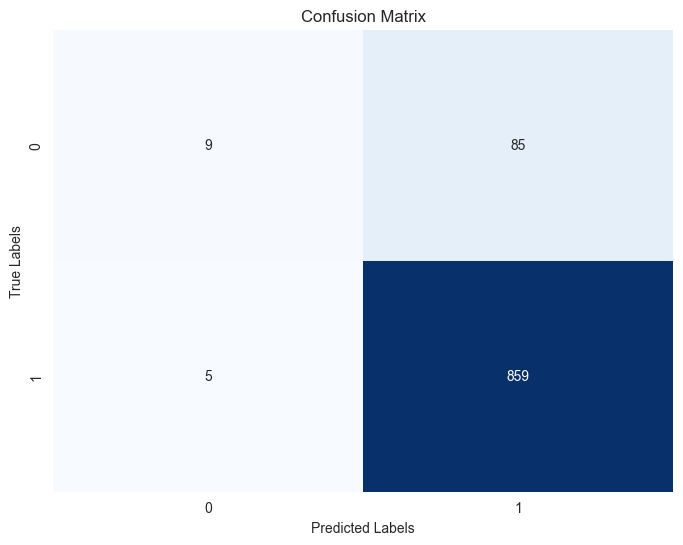

In [311]:
# Evaluate the best model on the test set
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


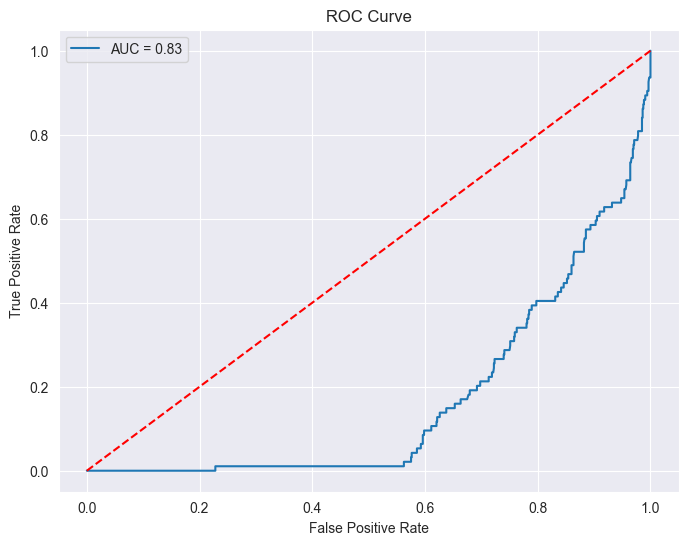

In [312]:
# Evaluate the best model on the test set
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Gentrifying')

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [313]:
# Compare the performance of different models
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Neural Network', 'K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Best Random Forest']
accuracy_scores = [accuracy, accuracy_rf, accuracy_svm, accuracy_gb, accuracy_nn, accuracy_knn, accuracy_dt, accuracy_nb, accuracy_lda, accuracy_qda, accuracy_best_rf]
precision_scores = [precision, precision_rf, precision_svm, precision_gb, precision_nn, precision_knn, precision_dt, precision_nb, precision_lda, precision_qda, precision_best_rf]
recall_scores = [recall, recall_rf, recall_svm, recall_gb, recall_nn, recall_knn, recall_dt, recall_nb, recall_lda, recall_qda, recall_best_rf]
f1_scores = [f1, f1_rf, f1_svm, f1_gb, f1_nn, f1_knn, f1_dt, f1_nb, f1_lda, f1_qda, f1_best_rf]

# Create a DataFrame to compare model performance
model_comparison = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Display the model comparison
print(model_comparison)


                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.902923   0.571429  0.042553  0.079208
1                     Random Forest  0.885177   0.289474  0.117021  0.166667
2                               SVM  0.901879   0.000000  0.000000  0.000000
3                 Gradient Boosting  0.903967   0.571429  0.085106  0.148148
4                    Neural Network  0.901879   0.500000  0.063830  0.113208
5               K-Nearest Neighbors  0.893528   0.394737  0.159574  0.227273
6                     Decision Tree  0.845511   0.170732  0.148936  0.159091
7                       Naive Bayes  0.784969   0.235849  0.531915  0.326797
8      Linear Discriminant Analysis  0.901879   0.500000  0.042553  0.078431
9   Quadratic Discriminant Analysis  0.572025   0.177551  0.925532  0.297945
10               Best Random Forest  0.906054   0.642857  0.095745  0.166667
